In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv',index_col=0,parse_dates=["Date"])
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2 KB


In [4]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


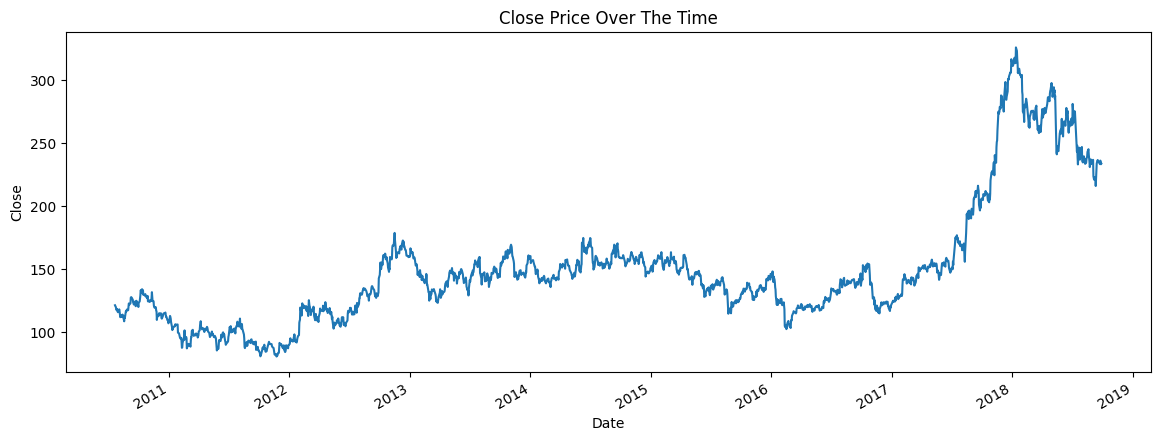

In [5]:
plt.figure(figsize=(14,5))
df['Close'].plot(x=df.index)
plt.ylabel('Close')
plt.title('Close Price Over The Time')
plt.show()

In [6]:
data = df[['Close']]
data = data.sort_index()
data

,Close
Date,
2010-07-21,121.55
2010-07-22,120.90
2010-07-23,120.65
2010-07-26,117.60
2010-07-27,118.65
...,...
2018-09-24,233.30
2018-09-25,236.10
2018-09-26,234.25


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [8]:
scaled_data.shape

(2035, 1)

In [9]:
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]
train_data.shape,test_data.shape

((1628, 1), (407, 1))

In [10]:
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        target = data.iloc[i+sequence_length]['Close']
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [11]:
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        target = data[i+sequence_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

In [12]:
sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [13]:
X_test.shape,X_train.shape

((397, 10, 1), (1618, 10, 1))

In [14]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1)) 

In [15]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam', loss='mean_squared_error',metrics=[RootMeanSquaredError()])

In [16]:
h = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
51/51 [==============================] - 3s 14ms/step - loss: 0.0129 - root_mean_squared_error: 0.1135 - val_loss: 0.0443 - val_root_mean_squared_error: 0.2105
Epoch 2/50
51/51 [==============================] - 0s 7ms/step - loss: 0.0011 - root_mean_squared_error: 0.0330 - val_loss: 0.0130 - val_root_mean_squared_error: 0.1139
Epoch 3/50
51/51 [==============================] - 0s 7ms/step - loss: 6.2632e-04 - root_mean_squared_error: 0.0250 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0892
Epoch 4/50
51/51 [==============================] - 0s 7ms/step - loss: 6.2253e-04 - root_mean_squared_error: 0.0250 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0868
Epoch 5/50
51/51 [==============================] - 0s 7ms/step - loss: 6.1246e-04 - root_mean_squared_error: 0.0247 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0833
Epoch 6/50
51/51 [==============================] - 0s 8ms/step - loss: 5.9792e-04 - root_mean_squared_error: 0.0245 - val_loss: 0.0066 -

In [17]:
y_pred = model.predict(X_test)

13/13 [==============================] - 0s 2ms/step


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
rscore = r2_score(y_test,y_pred)
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R Square Score: ",rscore)

Root Mean Squared Error: 0.06645582774251485
Mean Absolute Error: 0.04521413278378351
R Square Score:  0.9105231316571158


<function matplotlib.pyplot.show(close=None, block=None)>

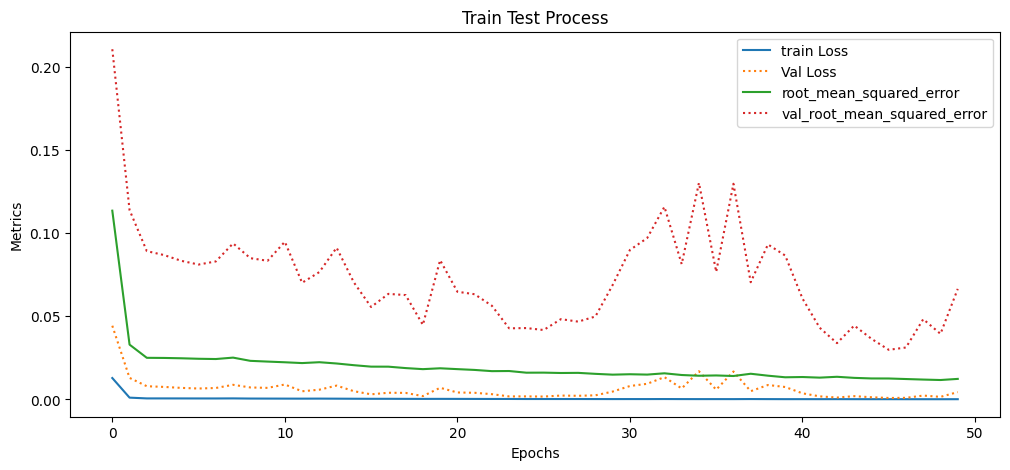

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(np.arange(50),h.history['loss'],label="train Loss")
plt.plot(np.arange(50),h.history['val_loss'],ls=":",label="Val Loss")
plt.plot(np.arange(50),h.history['root_mean_squared_error'],label="root_mean_squared_error")
plt.plot(np.arange(50),h.history['val_root_mean_squared_error'],ls=":",label="val_root_mean_squared_error")
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Train Test Process')
plt.legend()
plt.show

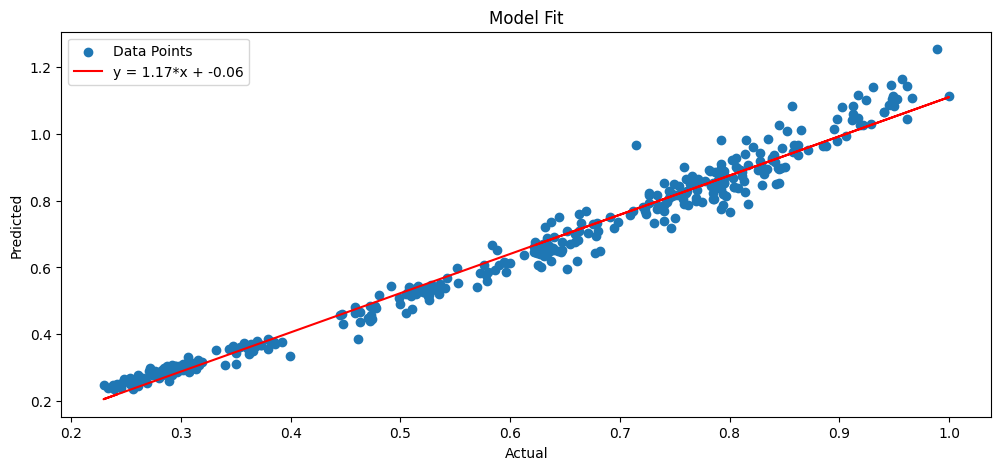

In [20]:
F = pd.DataFrame({"Actual":y_test.flatten(),"Predicted":y_pred.flatten()})
m,b = np.polyfit(F['Actual'],F['Predicted'],1)
plt.figure(figsize=(12,5))
plt.scatter(F['Actual'],F['Predicted'],label='Data Points')
plt.plot(F['Actual'],m*F['Actual']+b,color='red',label = f"y = {m:.2f}*x + {b:.2f}")
plt.title('Model Fit')
plt.xlabel('Actual')
plt.ylabel("Predicted")
plt.legend()
plt.show()